In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `/data/gpfs/projects/punim0638/stephenz/QROT/notebooks/ex_spiral`


In [2]:
using OptimalTransport
using Plots
using LinearAlgebra
using Random
using Distributions
using Distances
using Graphs
using SimpleWeightedGraphs
using GraphRecipes
using NearestNeighbors
using SparseArrays
using ManifoldLearning
using NNlib
using ForwardDiff
using QuadGK
using Roots
using MultivariateStats
using LaTeXStrings

In [3]:
include("../../src/util.jl")
Random.seed!(42)

TaskLocalRNG()

["output/spiral_results_pca_-1_N_1000_d_250_seed_1.csv", "output/spiral_results_pca_-1_N_1000_d_250_seed_10.csv", "output/spiral_results_pca_-1_N_1000_d_250_seed_2.csv", "output/spiral_results_pca_-1_N_1000_d_250_seed_3.csv", "output/spiral_results_pca_-1_N_1000_d_250_seed_4.csv", "output/spiral_results_pca_-1_N_1000_d_250_seed_5.csv", "output/spiral_results_pca_-1_N_1000_d_250_seed_6.csv", "output/spiral_results_pca_-1_N_1000_d_250_seed_7.csv", "output/spiral_results_pca_-1_N_1000_d_250_seed_8.csv", "output/spiral_results_pca_-1_N_1000_d_250_seed_9.csv"]

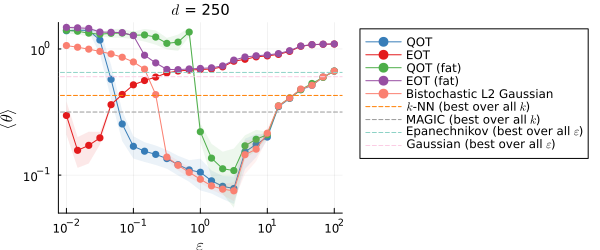

In [146]:
using DataFrames
using CSV
using Glob
using StatsPlots

pal=palette(:Set1_9)
_pal = palette(:Set3_9)

N = 1000
d = 250

fnames = Glob.glob("output/spiral_results_pca_-1_N_$(N)_d_$(d)_seed_*.csv")
df = [CSV.read(f, DataFrame) for f in fnames];
print(fnames)

plt=plot(; ylim = (0.05, π/2 + 0.05), size = (600, 250), title = latexstring("\$d\$ = $d"), titlefontsize = 10, yscale = :log10, legend = :outertopright, xlabel = L"\varepsilon", ylabel = L"\langle\theta\rangle", markerstrokewidth = 0)
errorline!(df[1].eps_quad, hcat([x.theta_quad for x in df]...), xscale = :log10, marker = :circle, label = "QOT", color = pal[2], groupcolor = pal[2], markerstrokewidth = 0)
errorline!(df[1].eps_ent, hcat([x.theta_ent for x in df]...), xscale = :log10, marker = :circle, label = "EOT", color = pal[1], groupcolor = pal[1], markerstrokewidth = 0)
errorline!(df[1].eps_quad, hcat([x.theta_quad_fat for x in df]...), xscale = :log10, marker = :circle, label = "QOT (fat)", color = pal[3], groupcolor = pal[3], markerstrokewidth = 0)
errorline!(df[1].eps_ent, hcat([x.theta_ent_fat for x in df]...), xscale = :log10, marker = :circle, label = "EOT (fat)", color = pal[4], groupcolor = pal[4], markerstrokewidth = 0)
errorline!(df[1].eps_ent, hcat([x.theta_gauss_l2 for x in df]...), xscale = :log10, marker = :circle, label = "Bistochastic L2 Gaussian", color = _pal[4], groupcolor = _pal[4], markerstrokewidth = 0)
hline!([mean([minimum(x.theta_knn) for x in df]), ], label = L"$k$-NN (best over all $k$)", color = pal[5], linestyle = :dash)
hline!([mean([minimum(x.theta_magic) for x in df]), ], label = L"MAGIC (best over all $k$)", color = pal[9], linestyle = :dash)
hline!([mean([minimum(x.theta_epanech) for x in df]), ], label = L"Epanechnikov (best over all $\varepsilon$)", color = _pal[1], linestyle = :dash)
hline!([mean([minimum(x.theta_gauss) for x in df]), ], label = L"Gaussian (best over all $\varepsilon$)", color = _pal[8], linestyle = :dash)
savefig("../figures/spiral_theta_N_$(N)_d_$(d).svg")
savefig("../figures/spiral_theta_N_$(N)_d_$(d).pdf")
plt

In [5]:
"--eps_quad_idx $(argmin(mean([x.theta_quad for x in df]))) --eps_ent_idx $(argmin(mean([x.theta_ent for x in df]))) --k_idx $(argmin(mean([x.theta_knn for x in df]))) --eps_epanech_idx $(argmin(mean([x.theta_epanech for x in df]))) --eps_gauss_idx $(argmin(mean([x.theta_gauss for x in df]))) --eps_gauss_l2_idx $(argmin(mean([x.theta_gauss_l2 for x in df]))) --k_magic_idx $(argmin(mean([x.theta_magic for x in df])))"

"--eps_quad_idx 16 --eps_ent_idx 2 --k_idx 10 --eps_epanech_idx 13 --eps_gauss_idx 9 --eps_gauss_l2_idx 16 --k_magic_idx 1"

In [151]:
;julia spiral.jl --N $N --d $d --seed 1 --threads 4 --save_mats true --eps_quad_idx $(argmin(mean([x.theta_quad for x in df]))) --eps_ent_idx $(argmin(mean([x.theta_ent for x in df]))) --k_idx $(argmin(mean([x.theta_knn for x in df]))) --eps_epanech_idx $(argmin(mean([x.theta_epanech for x in df]))) --eps_gauss_idx $(argmin(mean([x.theta_gauss for x in df]))) --eps_gauss_l2_idx $(argmin(mean([x.theta_gauss_l2 for x in df]))) --k_magic_idx $(argmin(mean([x.theta_magic for x in df])))

  Activating project at `/data/gpfs/projects/punim0638/stephenz/QROT/notebooks/ex_spiral`
[ Info: method: quad
Progress: 100%|█████████████████████████████████████████| Time: 0:00:31
[ Info: method: quad_fat
Progress: 100%|█████████████████████████████████████████| Time: 0:00:12
[ Info: method: ent
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
[ Info: method: ent_fat
Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
[ Info: method: knn
Progress: 100%|█████████████████████████████████████████| Time: 0:00:48
[ Info: method: epanechnikov
Progress: 100%|█████████████████████████████████████████| Time: 0:00:10
[ Info: method: gaussian
Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
[ Info: method: gaussian_l2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:20


Calculating MAGIC...
  Running MAGIC on 1000 cells and 250 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 0.18 seconds.
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 0.21 seconds.
Calculating MAGIC...
  Running MAGIC on 1000 cells and 250 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.03 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.07 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.17 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 0.20 seconds.
Calculating MAGIC...
  Running MAGIC on 10

Progress: 100%|█████████████████████████████████████████| Time: 0:00:15


In [152]:
using NPZ
X_orig = npzread("output/X_orig_pca_-1_N_$(N)_d_$(d)_seed_1.npy")
X_orig_lowdim = npzread("output/X_orig_lowdim_pca_-1_N_$(N)_d_$(d)_seed_1.npy")
X = npzread("output/X_pca_-1_N_$(N)_d_$(d)_seed_1.npy");

In [153]:
f(t) = [cos(t)*(0.5cos(6t)+1) sin(t)*(0.4cos(6t)+1) 0.4sin(6t)]
arclength(t::Real) = quadgk(t -> norm(ForwardDiff.derivative(f, t)), 0, t, rtol = 1e-8)[1]
L_tot = arclength(2π)
t_range_scaled = range(0, 1; length = N+1)[1:end-1]
θ_range = map(x -> find_zero(t -> arclength(t)/L_tot - x, (0., 2π)), t_range_scaled);

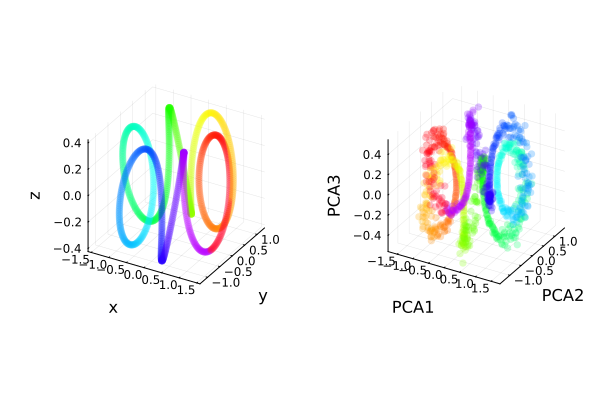

In [154]:
pca = fit(PCA, X; maxoutdim = 25)
X_pca = MultivariateStats.transform(pca, X)
plt1=Plots.scatter(collect(eachrow(X_orig_lowdim))...; 
        xlabel = "x", ylabel = "y", zlabel = "z", 
        marker_z = θ_range, color = :gist_rainbow, markerstrokewidth = 0, colorbar = nothing, legend = nothing, alpha = 0.25)
plt2=Plots.scatter(collect(eachrow(X_pca[1:3, :]))...; 
        xlabel = "PCA1", ylabel = "PCA2", zlabel = "PCA3", 
        marker_z = θ_range, color = :gist_rainbow, markerstrokewidth = 0, colorbar = nothing, legend = nothing, alpha = 0.25)
plt=plot(plt1, plt2)
savefig("../figures/spiral_clean_noisy.svg")
plt

In [155]:
seed = 1
pca = -1
K_best = Dict(join(split(what, "_")[1:end-1], "_") => npzread(Glob.glob("output/K_$(what)*_pca_$(pca)_N_$(N)_d_$(d)_seed_$(seed).npy")[1]) for what in ["quad_eps", "ent_eps", "knn_k", "magic_k", "epanech_eps", "gauss_eps", "gauss_l2_eps"]);
U_best = Dict(k => eigen(I - x).vectors for (k, x) in K_best)

Dict{String, Matrix{Float64}} with 7 entries:
  "quad"     => [-0.0316228 -0.0117412 … 0.0411974 -0.000117868; -0.0316228 -0.…
  "knn"      => [-0.0225832 0.00428893 … 0.0133524 -0.0072963; -0.0225832 -0.00…
  "epanech"  => [-0.0160498 -0.0386284 … 0.0380322 0.00245716; -0.0140474 -0.03…
  "gauss"    => [0.011126 0.00100402 … -3.2401e-6 6.18269e-5; 0.00979977 -0.001…
  "magic"    => [0.0316228 0.0449718 … 1.5169e-5 -3.80924e-8; 0.0316228 0.04515…
  "ent"      => [0.0316154 -0.00121 … 0.0105266 9.70141e-17; 0.0316154 0.001366…
  "gauss_l2" => [-0.0316228 0.0123802 … -1.67995e-6 -0.000213076; -0.0316228 0.…

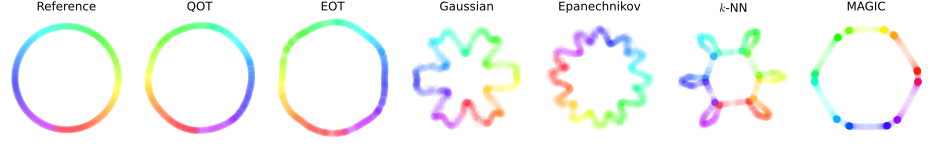

In [158]:
plt=Plots.plot(
     Plots.scatter(collect(eachcol(U_ref[:, 2:3]))...; alpha = 0.05, title = "Reference", marker_z = θ_range, color = :gist_rainbow, aspectratio = :equal, markerstrokewidth = 0),
     Plots.scatter(collect(eachcol(U_best["quad"][:, 2:3]))...; alpha = 0.05, title = "QOT", marker_z = θ_range, color = :gist_rainbow, aspectratio = :equal, markerstrokewidth = 0),
     Plots.scatter(collect(eachcol(U_best["ent"][:, 2:3]))...; alpha = 0.05, title = "EOT", marker_z = θ_range, color = :gist_rainbow, aspectratio = :equal, markerstrokewidth = 0), 
     Plots.scatter(collect(eachcol(U_best["gauss"][:, 2:3]))...; alpha = 0.05, title = "Gaussian", marker_z = θ_range, color = :gist_rainbow, aspectratio = :equal, markerstrokewidth = 0),
     Plots.scatter(collect(eachcol(U_best["epanech"][:, 2:3]))...; alpha = 0.05, title = "Epanechnikov", marker_z = θ_range, color = :gist_rainbow, aspectratio = :equal, markerstrokewidth = 0), 
     Plots.scatter(collect(eachcol(U_best["knn"][:, 2:3]))...; alpha = 0.05, title = L"$k$-NN", marker_z = θ_range, color = :gist_rainbow, aspectratio = :equal, markerstrokewidth = 0), 
     Plots.scatter(collect(eachcol(U_best["magic"][:, 2:3]))...; alpha = 0.05, title = "MAGIC", marker_z = θ_range, color = :gist_rainbow, aspectratio = :equal, markerstrokewidth = 0),
           ; legend = nothing, markersize = 4, markerstrokewidth = 0, colorbar = nothing, color = :viridis, xaxis = nothing, yaxis = nothing, layout = (1, 7), size = (933, 150), titlefontsize = 8, border = :none)
Plots.savefig("../figures/spiral_best.svg")
plt

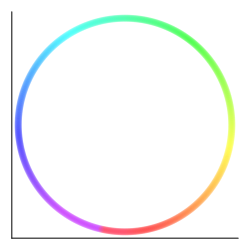

In [159]:
K_ref = npzread(Glob.glob("output/K_ref_*_d_$(d)_seed_1.npy")[1])
U_ref = eigen(I-K_ref).vectors;
plt=Plots.scatter(U_ref[:, 2], U_ref[:, 3], marker_z = θ_range, color = :gist_rainbow, aspectratio = :equal, markerstrokewidth = 0, axis = nothing, alpha = 0.1, size = (250, 250), legend = nothing)
Plots.savefig("../figures/spiral_ref.svg")
plt

In [160]:
# Geodesic approximation
K_quad = K_best["quad"]
K_ent = K_best["ent"];
K_knn = K_best["knn"];

In [161]:
# # simple bisection search to match perplexity
using LogExpFunctions
perplexity(K) = map(x -> exp(sum(-xlogx.(x))), eachrow(K))

perplexity (generic function with 1 method)

In [162]:
function varadhan_cost(W, p = 250; t_lo = 0, t_hi = 1e2, maxiter = 25, tol = 1e-2)
    L_op = I - W
    # bisection search for t to satisfy desired perplexity
    K = similar(W)
    for _ = 1:maxiter
        t = (t_lo + t_hi) / 2
        K .= exp(-t*L_op) .+ 1e-12
        _p = mean(perplexity(K))
        if abs(p - _p)/p < tol
            @info _p
            break
        end
        if _p > p
            t_hi = t
        else
            t_lo = t
        end
    end
    -log.(K)
end

C_quad = varadhan_cost(K_quad)
C_ent = varadhan_cost(K_ent);
C_ref = varadhan_cost(K_ref; t_hi = 1e4);
C_knn = varadhan_cost(K_knn);

[ Info: 249.74649985209112
[ Info: 252.4742280660177
[ Info: 249.43367472492372
[ Info: 249.59455592745172


In [175]:
using Printf 
f(x, t, σ) = exp(-(x-t)^2 / σ^2)
μ = normalize(f.(t_range_scaled, 0.25, 0.05), 1)
ν = normalize(f.(t_range_scaled, 0.75, 0.05), 1)
eps = 1 # since no prefactor in varadhan

μs = Dict()
plts = Dict()

T = 9 # 25

for (what, C) in zip([:ent, :quad, :ref, :knn], [C_ent, C_quad, C_ref, C_knn])
    _μs = []
    _plts = []
    for s in range(0, 1; length = T)
        μ_interp = sinkhorn_barycenter(hcat(μ, ν), C, eps, [s, 1-s], SinkhornGibbs())
        push!(_μs, μ_interp)
        push!(_plts, scatter(X_pca[1, :], X_pca[2, :], X_pca[3, :]; 
                            marker_z = μ_interp, msw = 0, colorbar = nothing, 
                            legend = nothing, clim = (0, quantile(μ_interp, 0.95)), 
                            xaxis = nothing, yaxis = nothing, zaxis = nothing, border = :none, 
                            aspectratio = :equal, markersize = 2.5, alpha = 0.25, c = :viridis
                           ))
    end
    μs[what] = _μs
    plts[what] = _plts
end

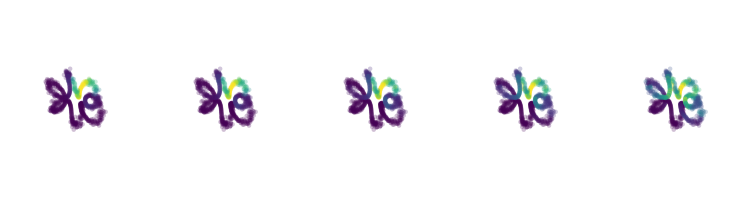

In [176]:
idx = [1, 3, 5, 7, 9]
plt=plot(plts[:knn][idx]...; layout = (1, 5), size = (750, 200), cam = (30, 70))
savefig("../figures/geodesic_knn.svg")
plt

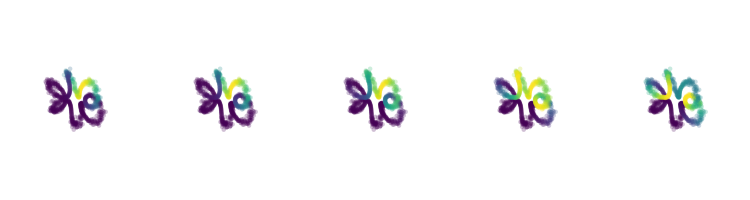

In [177]:
plt=plot(plts[:ref][idx]...; layout = (1, 5), size = (750, 200), cam = (30, 70))
savefig("../figures/geodesic_ref.svg")
plt

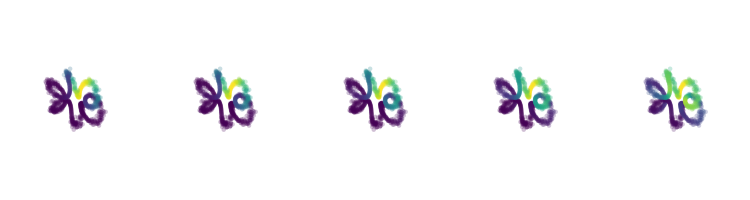

In [178]:
plt=plot(plts[:ent][idx]...; layout = (1, 5), size = (750, 200), cam = (30, 70))
savefig("../figures/geodesic_ent.svg")
plt

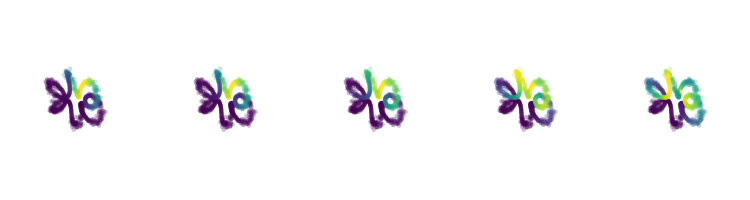

In [179]:
plt=plot(plts[:quad][idx]...; layout = (1, 5), size = (750, 200), cam = (30, 70))
savefig("../figures/geodesic_quad.svg")
plt

┌ Warning: Sinkhorn algorithm (1000/1000): not converged
└ @ OptimalTransport ~/.julia/packages/OptimalTransport/p1fRd/src/entropic/sinkhorn_solve.jl:103
┌ Warning: Sinkhorn algorithm (1000/1000): not converged
└ @ OptimalTransport ~/.julia/packages/OptimalTransport/p1fRd/src/entropic/sinkhorn_solve.jl:103
┌ Warning: Sinkhorn algorithm (1000/1000): not converged
└ @ OptimalTransport ~/.julia/packages/OptimalTransport/p1fRd/src/entropic/sinkhorn_solve.jl:103
┌ Warning: Sinkhorn algorithm (1000/1000): not converged
└ @ OptimalTransport ~/.julia/packages/OptimalTransport/p1fRd/src/entropic/sinkhorn_solve.jl:103
┌ Warning: Sinkhorn algorithm (1000/1000): not converged
└ @ OptimalTransport ~/.julia/packages/OptimalTransport/p1fRd/src/entropic/sinkhorn_solve.jl:103
┌ Warning: Sinkhorn algorithm (1000/1000): not converged
└ @ OptimalTransport ~/.julia/packages/OptimalTransport/p1fRd/src/entropic/sinkhorn_solve.jl:103
┌ Warning: Sinkhorn algorithm (1000/1000): not converged
└ @ OptimalTranspor

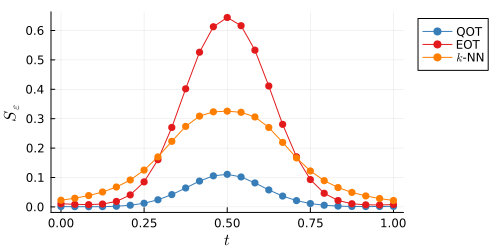

In [180]:
plt=plot(; xlabel = L"$t$", ylabel = L"S_\varepsilon", size = (500, 250), legend = :outertopright)
for (n, what, pal_idx) in zip([:quad, :ent, :knn], ["QOT", "EOT", L"$k$-NN"], [2, 1, 5])
    plot!(range(0, 1, length = T), map(((x, y),) -> sinkhorn_divergence(x, y, C_ref, 0.1), zip(μs[n], μs[:ref])); label = what, color = pal[pal_idx], marker = :circle, markerstrokewidth = 0)
end
savefig("../figures/geodesic_distances.svg")
plt

In [101]:
thetas_quad, thetas_ent, thetas_knn = [], [], []
ns_pcas = []
for i = 1:10
    fnames = Glob.glob("output/spiral_results_pca_*_N_$(N)_d_$(d)_seed_$(i).csv")
    fnames = fnames[.!contains.(fnames, "pca_-1")]
    n_pcas = [parse(Int, split(x, "_")[4]) for x in fnames]
    res = [CSV.read(f, DataFrame) for f in fnames]
    theta_quad, theta_ent, theta_knn = zip(map(x -> (x.theta_quad[1], x.theta_ent[1], x.theta_knn[1]), res)...);
    push!(thetas_quad, collect(theta_quad)[sortperm(n_pcas)])
    push!(thetas_ent, collect(theta_ent)[sortperm(n_pcas)])
    push!(thetas_knn, collect(theta_knn)[sortperm(n_pcas)])
    push!(ns_pcas, sort(n_pcas))
end

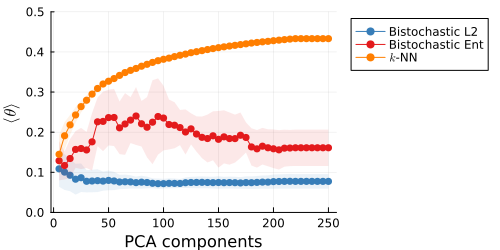

In [102]:
plt=errorline(ns_pcas[1], hcat(thetas_quad...), marker = :circle, label = "Bistochastic L2", legend = :outertopright, color = pal[2], groupcolor = pal[2], xlabel = "PCA components", ylabel = L"$\langle \theta \rangle$", markerstrokewidth = 0, size = (500, 250), ylim = (0, 0.5))
errorline!(ns_pcas[1], hcat(thetas_ent...); color = pal[1], groupcolor = pal[1], marker = :circle, markerstrokewidth = 0, label = "Bistochastic Ent")
errorline!(ns_pcas[1], hcat(thetas_knn...); color = pal[5], groupcolor = pal[5], marker = :circle, markerstrokewidth = 0, label = L"$k$-NN")
savefig(plt, "../figures/spiral_dim_pca.svg")
plt

In [63]:
eps_quad_opt = df[1].eps_quad[argmin(mean([x.theta_quad for x in df]))]
eps_ent_opt = df[1].eps_ent[argmin(mean([x.theta_ent for x in df]))];
k_opt = df[1].k[argmin(mean([x.theta_knn for x in df]))]

50

In [74]:
plts_quad = []
plts_ent = []
plts_knn = []
for d in [5, 25, 50, 100, 250]
    pca_op = fit(PCA, X; maxoutdim = d)
    X_pca = pca_op.proj' * X;
    K_quad = kernel_ot_quad(X_pca, eps_quad_opt)
    U_quad = eigen(K_quad).vectors;
    push!(plts_quad, scatter(collect(eachcol(U_quad[:, end-2:end-1]))...; alpha = 0.1, markerstrokewidth = 0, marker_z = θ_range, color = :gist_rainbow, title = latexstring("\$d\$ = $d")))
    K_ent = kernel_ot_ent(X_pca, eps_ent_opt)
    U_ent = eigen(K_ent).vectors;
    push!(plts_ent, scatter(collect(eachcol(U_ent[:, end-2:end-1]))...; alpha = 0.1, markerstrokewidth = 0, marker_z = θ_range, color = :gist_rainbow, title = latexstring("\$d\$ = $d")))
    K_knn = Array(norm_kernel(form_kernel(X_pca, 1.0; k = k_opt), :sym))
    U_knn = eigen(K_knn).vectors;
    push!(plts_knn, scatter(collect(eachcol(U_knn[:, end-2:end-1]))...; alpha = 0.1, markerstrokewidth = 0, marker_z = θ_range, color = :gist_rainbow, title = latexstring("\$d\$ = $d")))
end

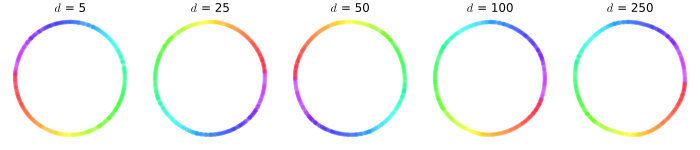

In [75]:
plt=plot(plts_quad...; layout = (1, 5), legend = nothing, markersize = 2.5, markerstrokewidth = 0, colorbar = nothing, xaxis = nothing, yaxis = nothing, size = (700, 150), titlefontsize = 8, border = :none, alpha = 1)
savefig("../figures/spiral_dim_pca_quad.svg")
plt

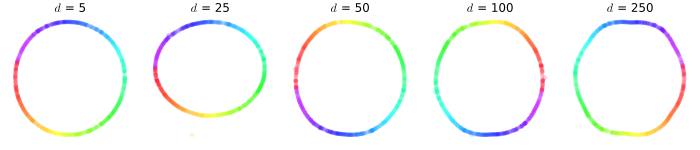

In [76]:
plt=plot(plts_ent...; layout = (1, 5), legend = nothing, markersize = 2.5, markerstrokewidth = 0, colorbar = nothing, xaxis = nothing, yaxis = nothing, size = (700, 150), titlefontsize = 8, border = :none, alpha = 1)
savefig("../figures/spiral_dim_pca_ent.svg")
plt

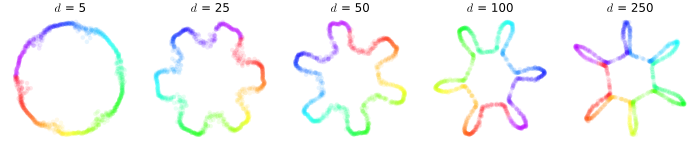

In [77]:
plt=plot(plts_knn...; layout = (1, 5), legend = nothing, markersize = 2.5, markerstrokewidth = 0, colorbar = nothing, xaxis = nothing, yaxis = nothing, size = (700, 150), titlefontsize = 8, border = :none, alpha = 1)
savefig("../figures/spiral_dim_pca_knn.svg")
plt

In [106]:
k_opt

50